In [1]:
import numpy as np
import proplot as pplt
import fitsio
import glob

In [2]:
fnames = glob.glob("gaia*.fits")
d = []
for f in fnames:
    d.append(fitsio.read(f, lower=True))
d = np.concatenate(d, axis=0)

In [3]:
d.dtype.names

('ext_mash',
 'phot_g_mean_mag',
 'mag_auto_g',
 'mag_auto_r',
 'mag_auto_i',
 'mag_auto_z',
 'coadd_object_id',
 'source_id',
 'ra',
 'dec',
 'ra_des',
 'dec_des')

In [4]:
gmi = d["mag_auto_g"] - d["mag_auto_i"]
msk = (gmi > -4) & (gmi < 4)
d = d[msk]
gmi = gmi[msk]

In [5]:
np.mean(d["ext_mash"] == 4)

0.0411637912597882

Text(0, 0.5, 'fraction with ext_mash=4')

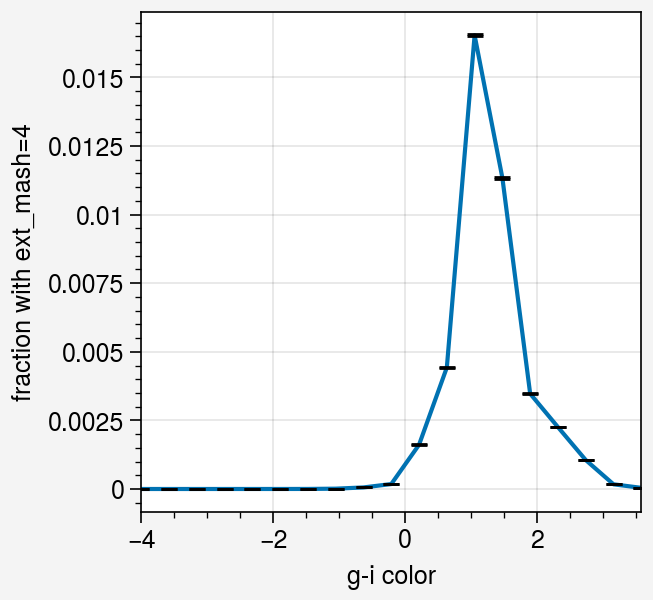

In [6]:
isgal = (d["ext_mash"] == 4).astype(int)

h, be = np.histogram(gmi, bins=np.linspace(-4, 4, 20), weights=isgal)

h = h.astype(float)

m = h.copy() / d.shape[0]
merr = np.sqrt(h) / d.shape[0]

fig, axs = pplt.subplots()
axs.plot(be[:-1], m, bardata=merr)
axs.set_xlabel("g-i color")
axs.set_ylabel("fraction with ext_mash=4")

In [7]:
from smatch import Matcher

In [8]:
m = Matcher(d["ra"], d["dec"])

In [9]:
angle = 2.0*np.sin(np.deg2rad(2/3600.0)/2.0)
idx = m.tree.query_ball_tree(m.tree, angle, eps=0)

nmatch = np.array([len(j) for j in idx])

Text(0.5, 1.0, 'ext_mash=4 and nmatch=2: 0.000183')

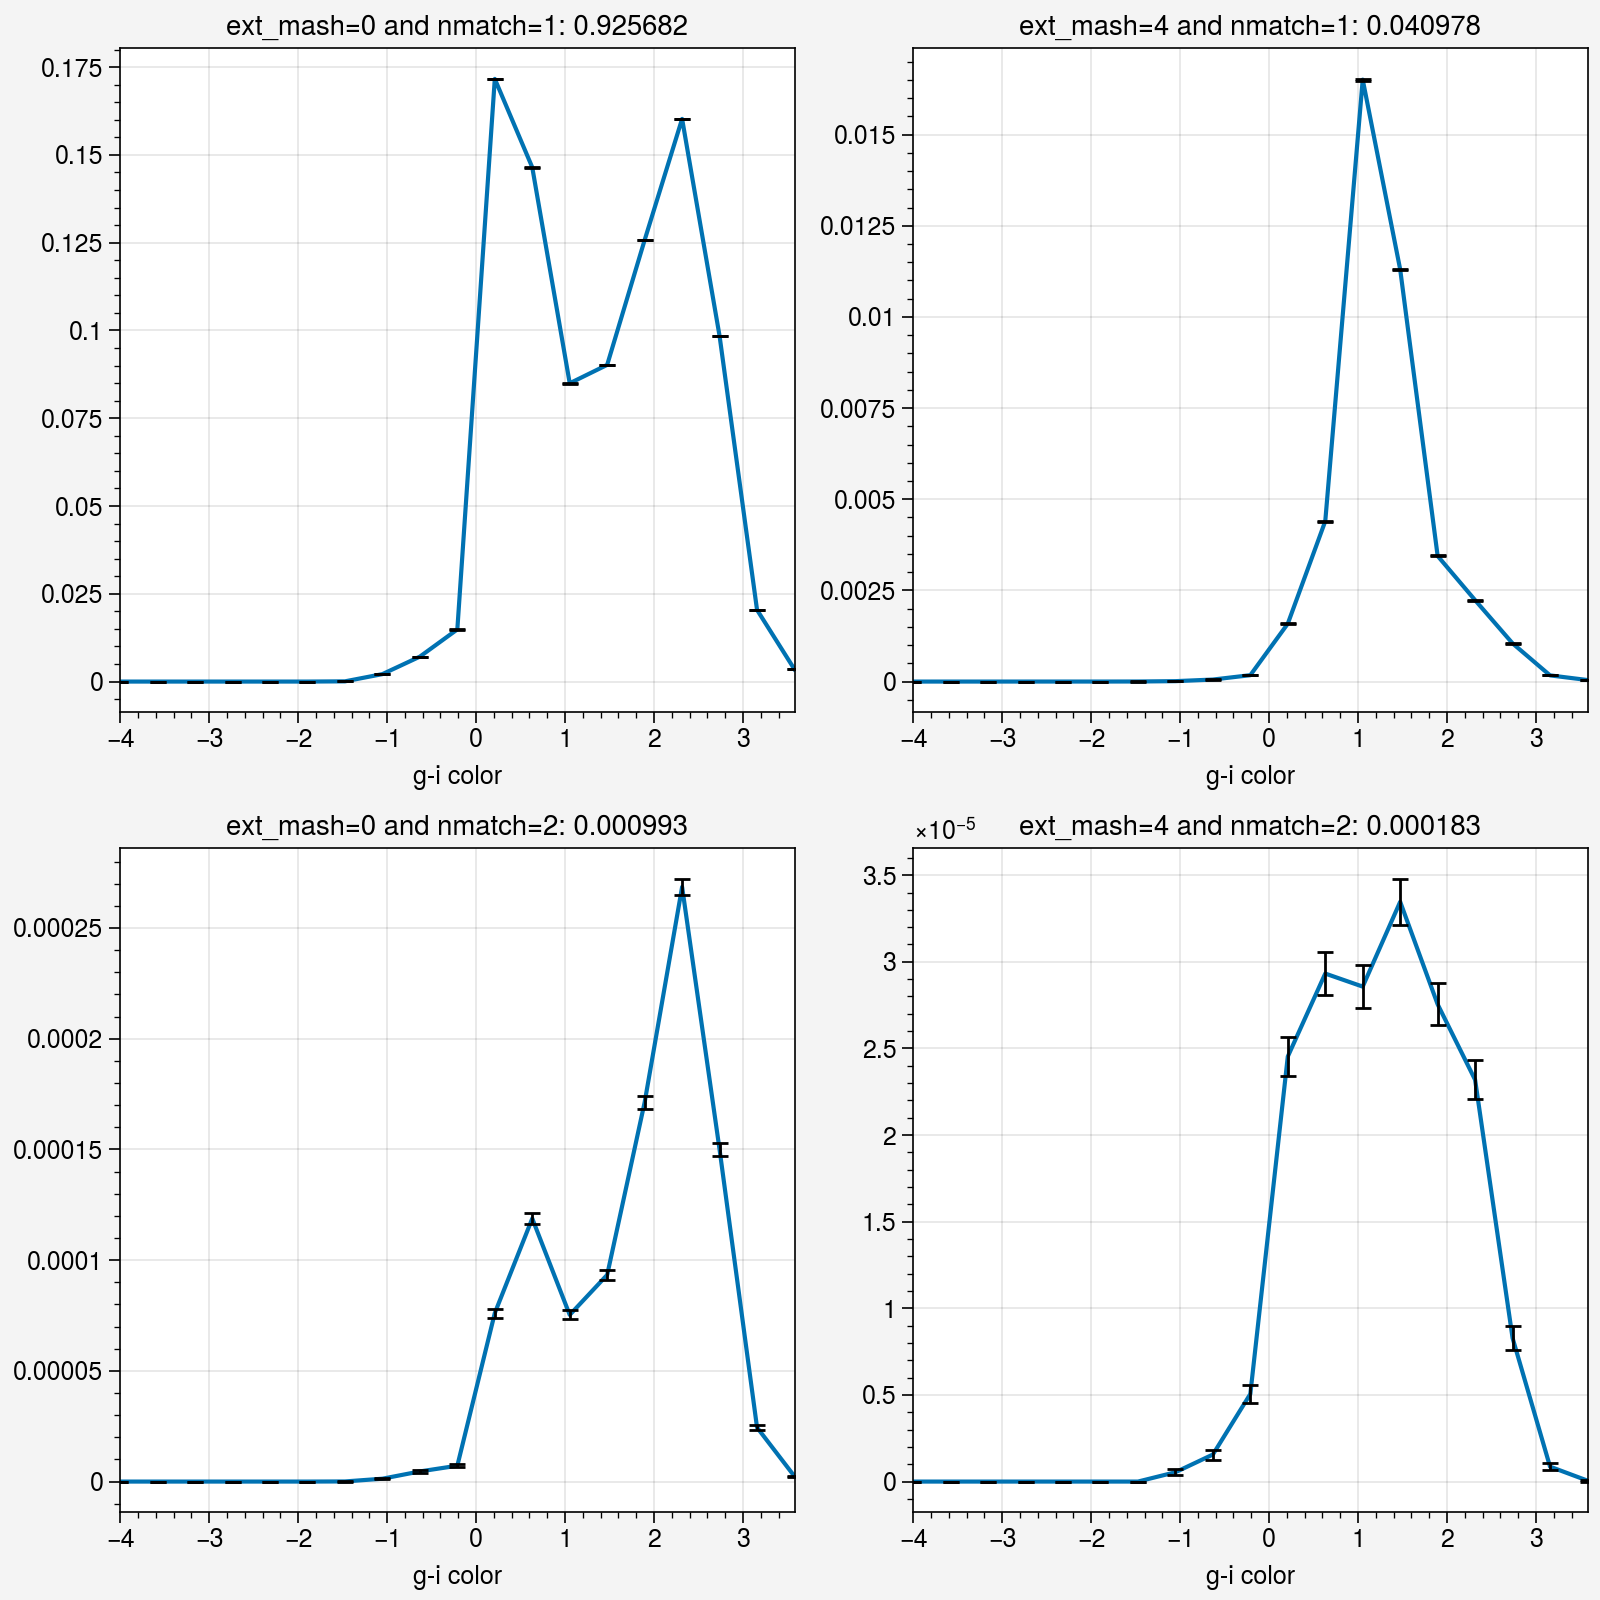

In [21]:
fig, axs = pplt.subplots(nrows=2, ncols=2, share=0, figsize=(8, 8))

isgal = ((d["ext_mash"] == 0) & (nmatch == 1)).astype(int)
h, be = np.histogram(gmi, bins=np.linspace(-4, 4, 20), weights=isgal)
h = h.astype(float)
m = h.copy() / d.shape[0]
merr = np.sqrt(h) / d.shape[0]
axs[0, 0].plot(be[:-1], m, bardata=merr)
axs[0, 0].set_xlabel("g-i color")
axs[0, 0].set_title("ext_mash=0 and nmatch=1: %f" % np.mean(isgal))

isgal = ((d["ext_mash"] == 4) & (nmatch == 1)).astype(int)
h, be = np.histogram(gmi, bins=np.linspace(-4, 4, 20), weights=isgal)
h = h.astype(float)
m = h.copy() / d.shape[0]
merr = np.sqrt(h) / d.shape[0]
axs[0, 1].plot(be[:-1], m, bardata=merr)
axs[0, 1].set_xlabel("g-i color")
axs[0, 1].set_title("ext_mash=4 and nmatch=1: %f" % np.mean(isgal))

isgal = ((d["ext_mash"] == 0) & (nmatch == 2)).astype(int)
h, be = np.histogram(gmi, bins=np.linspace(-4, 4, 20), weights=isgal)
h = h.astype(float)
m = h.copy() / d.shape[0]
merr = np.sqrt(h) / d.shape[0]
axs[1, 0].plot(be[:-1], m, bardata=merr)
axs[1, 0].set_xlabel("g-i color")
axs[1, 0].set_title("ext_mash=0 and nmatch=2: %f" % np.mean(isgal))

isgal = ((d["ext_mash"] == 4) & (nmatch == 2)).astype(int)
h, be = np.histogram(gmi, bins=np.linspace(-4, 4, 20), weights=isgal)
h = h.astype(float)
m = h.copy() / d.shape[0]
merr = np.sqrt(h) / d.shape[0]
axs[1, 1].plot(be[:-1], m, bardata=merr)
axs[1, 1].set_xlabel("g-i color")
axs[1, 1].set_title("ext_mash=4 and nmatch=2: %f" % np.mean(isgal))